# **Lab 1 - Explainable and Trustworthy AI**


---



**Teaching Assistant**: Eleonora Poeta (eleonora.poeta@polito.it)

**Lab 1:** Interpretable by design models on structured data

# **Decision Trees**


---



* Decision trees offer an approach to achieve interpretability-by-design of machine learning models.  They give a transparent and intuitive representation of the decision-making process followed by the model. This transparency allows domain experts to easily understand and validate the model's predictions.

When assessing the interpretability of decision trees, several key aspects should be considered depending if assessing *global* or *local* interpretability.
In particular, you have to analyze:



1.   When assessing **global** interpretability you have to *inspect the entire decision tree*. Then, as mesures for the global interpretability there are:


> * **Depth** of the tree → Shallow trees with fewer levels are easier to interpret, as they represent simpler decision rules. In contrast, deeper trees may become overly complex and difficult to interpret, potentially sacrificing transparency for improved accuracy.
* **Size** of the tree → This includes the *number of nodes* and the *number of splits*. A larger tree with more nodes and splits may capture intricate patterns in the data but could also lead to overfitting and decreased interpretability.




2.  When assessing **local** interpretability you have to *inspect the individual path of a single prediction.* Then, as mesures for the local interpretability there is:


> * **Lenght** of the individual path.




---

## **Exercise 1**
The *Diabetes prediction dataset* comprises medical and demographic data, alongside diabetes status (positive:1/negative:0) of patients. It includes features like age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.
In the following exercise you have to:

* Fit a [**Decision tree classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) model on **Diabetes dataset** and evaluate it calculating model's accuracy.


> *   Visualize the decision tree obtained. Are you able to interpret the decision process?
*   Try again with `max_depth=4` and compare the two trees. Which one is the most interpretable?




* Analyze **Global Interpretability**:


> * Continue visualizing the obtained decision tree with `max_depth=4`. Which attributes are the most discriminating? Plot the feature importances and then analyze the values.
* Calculate the size of the decision tree in terms of the number of nodes, subdivisions, and depth. How these metrics affect the interpretability of the decision tree globally?


* Analyze **Local Interpretability**:


> * Consider the instances 100, 150 and 200 of the train dataset.
* What are the individual paths? What are the instances allocated in the paths?
* For each of the previous instances, calculate the length of each path from the root node to the leaf node to which the instance belongs. How the length of these paths contributes to the interpretability of the decision tree locally?


***Hint*** :

> * Before starting do some **preprocessing** of the Diabetes dataset as previously seen in Lab 0.1 (Address null values and preprocess categorical attributes.)
* As **split ratio** for the dataset use the standard one: train (80%) and test (20%). Account for any class imbalance during the train-test split by making use of the **stratify** argument



## **Solution:**

### Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# If your dataset is stored on Google Drive, mount the drive before reading it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Preprocessing

In [ ]:
#Read data from CSV file stored in Google Drive and visualize the first 10 rows
df = pd.read_csv('/content/drive/MyDrive/XAI course_material/diabetes.csv')
# Otherwise, if you are working on GitHub run the following command
# !wget url github


In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
# Check if the dataset is balanced
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Check for duplicate values

In [ ]:
# check for duplicate rows
duplicates = df.duplicated(keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 6939


In [ ]:
df_duplicates = df.loc[duplicates]
df_duplicates

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# check for duplicate rows
duplicates = df.duplicated(keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")
print(f"New number of samples after removing duplicates: {len(df)}")

Number of duplicate rows: 0
New number of samples after removing duplicates: 96146


In [ ]:
# Split into training and test set
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['diabetes'])

In [ ]:
# Print the number of samples in training and test set
print(f"Number of training examples: {len(df_train)}")
print(f"Number of test examples: {len(df_test)}")

Number of training examples: 76916
Number of test examples: 19230


Check for missing values

In [ ]:
print(f'Are there any null values? Training: {df_train.isnull().values.any()}, Test: {df_test.isnull().values.any()}')

Are there any null values? Training: False, Test: False


In [ ]:
nan_count_train = df_train.isna().sum()
nan_count_test = df_test.isna().sum()

In [ ]:
print("Train")
print(nan_count_train)

Train
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
print("Test")
print(nan_count_test)

Test
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Discretize age column.

In [ ]:
age_category = ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']

df_train['age_disc']=pd.cut(x=df_train['age'], bins=[0,14,24,50,100],labels=age_category)
df_train = df_train.drop(columns=['age']) # Remove the old age column

df_test['age_disc']=pd.cut(x=df_test['age'], bins=[0,14,24,50,100],labels=age_category)
df_test = df_test.drop(columns=['age']) # Remove the old age column

In [ ]:
print(list(set(df_train.smoking_history.tolist())))

['No Info', 'not current', 'former', 'ever', 'never', 'current']


In [ ]:
print(list(set(df_test.smoking_history.tolist())))

['No Info', 'not current', 'former', 'ever', 'never', 'current']


In [ ]:
print(df_train.smoking_history.value_counts())

never          27509
No Info        26307
former          7476
current         7349
not current     5108
ever            3167
Name: smoking_history, dtype: int64


In [ ]:
print(df_test.smoking_history.value_counts())

never          6889
No Info        6580
current        1848
former         1823
not current    1259
ever            831
Name: smoking_history, dtype: int64


Combine not current and former

In [ ]:
df_train.loc[df_train['smoking_history'] == 'former', 'smoking_history'] = 'not current'
df_test.loc[df_test['smoking_history'] == 'former', 'smoking_history'] = 'not current'

In [ ]:
print(df_train.smoking_history.value_counts())

never          27509
No Info        26307
not current    12584
current         7349
ever            3167
Name: smoking_history, dtype: int64


In [ ]:
print(df_test.smoking_history.value_counts())

never          6889
No Info        6580
not current    3082
current        1848
ever            831
Name: smoking_history, dtype: int64


In [ ]:
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

In [ ]:
df_train_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
79000,Male,0,0,No Info,23.87,5.7,126,0,Adults (24-50]
32011,Female,0,0,not current,33.03,4.0,126,0,Senior (50+]
95559,Female,0,0,No Info,27.32,6.6,126,0,Adults (24-50]
32057,Male,1,0,No Info,28.86,4.8,80,0,Adults (24-50]
97797,Female,0,0,not current,26.48,6.5,200,0,Adults (24-50]


In [ ]:
smoking_history_order = ["never", "not current", "No Info", "current", "ever"]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder specifying the list of the categories
ord_enc = OrdinalEncoder(categories=[smoking_history_order, age_category])

# Fit the OrdinalEncoder on training data
ord_enc.fit(df_train_encoded[['smoking_history', 'age_disc']])

ord_enc

OrdinalEncoder(categories=[['never', 'not current', 'No Info', 'current',
                            'ever'],
                           ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]',
                            'Senior (50+]']])

In [ ]:
df_train_encoded[["smoking_history", "age_disc"]] = ord_enc.transform(df_train_encoded.loc[:, ["smoking_history", "age_disc"]])
df_test_encoded[["smoking_history", "age_disc"]] = ord_enc.transform(df_test_encoded.loc[:, ["smoking_history", "age_disc"]])

In [ ]:
df_train_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
79000,Male,0,0,2.0,23.87,5.7,126,0,2.0
32011,Female,0,0,1.0,33.03,4.0,126,0,3.0
95559,Female,0,0,2.0,27.32,6.6,126,0,2.0
32057,Male,1,0,2.0,28.86,4.8,80,0,2.0
97797,Female,0,0,1.0,26.48,6.5,200,0,2.0


In [ ]:
df_test_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
82004,Female,0,0,3.0,36.77,6.6,159,0,3.0
10542,Male,0,0,2.0,22.29,4.5,90,0,0.0
31572,Female,1,0,1.0,34.24,6.2,90,0,3.0
98055,Male,0,0,1.0,24.39,4.0,100,0,3.0
49107,Male,0,1,2.0,35.00,4.5,145,0,3.0


In [ ]:
print(df_train_encoded.gender.value_counts())

Female    44817
Male      32085
Other        14
Name: gender, dtype: int64


In [ ]:
print(df_test_encoded.gender.value_counts())

Female    11344
Male       7882
Other         4
Name: gender, dtype: int64


In [ ]:
# Remove all the rows where gender = 'Other'

df_train_encoded = df_train_encoded[df_train_encoded['gender'] != 'Other']
df_test_encoded = df_test_encoded[df_test_encoded['gender'] != 'Other']

In [ ]:
print(df_train_encoded.gender.value_counts())

Female    44817
Male      32085
Name: gender, dtype: int64


In [ ]:
print(df_test_encoded.gender.value_counts())

Female    11344
Male       7882
Name: gender, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

ohe_categorical_columns = ['gender']

# Fit the one-hot encoder on training data
ohe.fit(df_train_encoded[ohe_categorical_columns])

# Create a new DataFrame with only the one-hot encoded columns
temp_df_train = pd.DataFrame(data=ohe.transform(df_train_encoded[ohe_categorical_columns]).toarray(),
                             columns=ohe.get_feature_names_out())

# Remove the old categorical columns from the original data
df_train_encoded.drop(columns=ohe_categorical_columns, axis=1, inplace=True)
df_train_encoded = pd.concat([df_train_encoded.reset_index(drop=True), temp_df_train], axis=1)

# Perform the same procedure on the test set
temp_df_test = pd.DataFrame(data=ohe.transform(df_test_encoded[ohe_categorical_columns]).toarray(),
                       columns=ohe.get_feature_names_out())

df_test_encoded.drop(columns=ohe_categorical_columns, axis=1, inplace=True)
df_test_encoded = pd.concat([df_test_encoded.reset_index(drop=True), temp_df_test], axis=1)

In [ ]:
df_train_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,2.0,23.87,5.7,126,0,2.0,0.0,1.0
1,0,0,1.0,33.03,4.0,126,0,3.0,1.0,0.0
2,0,0,2.0,27.32,6.6,126,0,2.0,1.0,0.0
3,1,0,2.0,28.86,4.8,80,0,2.0,0.0,1.0
4,0,0,1.0,26.48,6.5,200,0,2.0,1.0,0.0


In [ ]:
df_test_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,3.0,36.77,6.6,159,0,3.0,1.0,0.0
1,0,0,2.0,22.29,4.5,90,0,0.0,0.0,1.0
2,1,0,1.0,34.24,6.2,90,0,3.0,1.0,0.0
3,0,0,1.0,24.39,4.0,100,0,3.0,0.0,1.0
4,0,1,2.0,35.00,4.5,145,0,3.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['bmi', 'HbA1c_level', 'blood_glucose_level', 'age_disc', 'smoking_history' ]

minmax_s = MinMaxScaler()

minmax_s.fit(df_train_encoded[features_to_normalize])

df_train_encoded[features_to_normalize] = minmax_s.transform(df_train_encoded[features_to_normalize])
df_test_encoded[features_to_normalize] = minmax_s.transform(df_test_encoded[features_to_normalize])

In [ ]:
df_train_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,0.50,0.162657,0.400000,0.209091,0,0.666667,0.0,1.0
1,0,0,0.25,0.270156,0.090909,0.209091,0,1.000000,1.0,0.0
2,0,0,0.50,0.203145,0.563636,0.209091,0,0.666667,1.0,0.0
3,1,0,0.50,0.221218,0.236364,0.000000,0,0.666667,0.0,1.0
4,0,0,0.25,0.193287,0.545455,0.545455,0,0.666667,1.0,0.0


In [ ]:
df_test_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,0.75,0.314048,0.563636,0.359091,0,1.0,1.0,0.0
1,0,0,0.50,0.144115,0.181818,0.045455,0,0.0,0.0,1.0
2,1,0,0.25,0.284356,0.490909,0.045455,0,1.0,1.0,0.0
3,0,0,0.25,0.168760,0.090909,0.090909,0,1.0,0.0,1.0
4,0,1,0.50,0.293275,0.181818,0.295455,0,1.0,0.0,1.0


In [ ]:
# Extract target variable and input features for the training data
y_train = df_train_encoded['diabetes']
X_train = df_train_encoded.drop('diabetes', axis=1)


# Extract target variable and input features for  the testing data
y_test = df_test_encoded['diabetes']
X_test = df_test_encoded.drop('diabetes', axis=1)

### Fit the decision tree

In [ ]:
# define the model
model = tree.DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# extract the feature names
feature_names = X_train.columns
tree.plot_tree(model, feature_names=feature_names)

**Clearly, the tree obtained is not readable or interpretable. Let's try to reduce the depth of the tree with `max_depth=4`**

###Decision Tree: Max-depth = 4

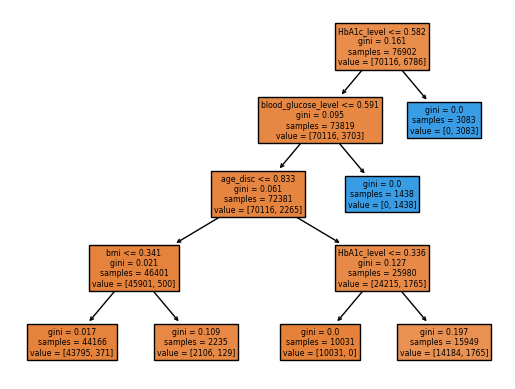

In [ ]:
# define the model
new_model = tree.DecisionTreeClassifier(max_depth = 4)
# fit the model
new_model.fit(X_train, y_train)
# extract the feature names
feature_names = X_train.columns
tree.plot_tree(new_model, feature_names=feature_names, filled=True)
plt.show()

In [ ]:
y_pred = new_model.predict(X_test)
print('Model accuracy: ', new_model.score(X_test, y_test)*100)

Model accuracy:  97.16009570373453


### Analyze Global Interpretability

To analyze the global interpretability, we can examine the **discriminating attributes**. This will show you the importance of each feature in the decision-making process.

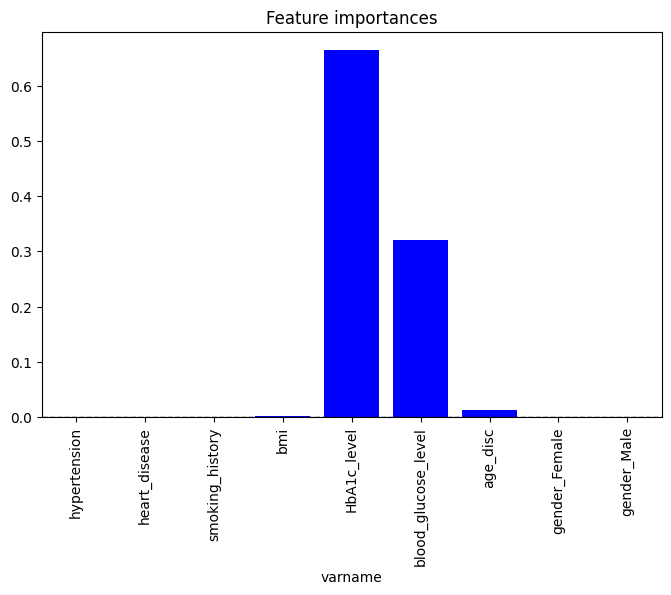

In [ ]:
#Plot the feature importance

importance = new_model.feature_importances_

#Plot the weights
coef_df = pd.DataFrame({'coef': importance,
                        'varname': X_train.columns
                       })

coef_df.plot(y='coef', x='varname', kind='bar', color='none', legend=False, figsize=(8,5))
plt.bar(coef_df['varname'], coef_df['coef'], color='blue')
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)
#plt.title("Coefficients of Logistic Regression")
plt.title("Feature importances")
plt.show()

In [ ]:
# Feature importances
importances = new_model.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


               Feature  Importance
4          HbA1c_level    0.665046
5  blood_glucose_level    0.320518
6             age_disc    0.013182
3                  bmi    0.001253
0         hypertension    0.000000
1        heart_disease    0.000000
2      smoking_history    0.000000
7        gender_Female    0.000000
8          gender_Male    0.000000


In [ ]:
# Compute the number of nodes
num_nodes = new_model.tree_.node_count
print(num_nodes)

11


In [ ]:
# Compute the number of splits
num_splits = num_nodes - 1  # Total number of splits is one less than the number of nodes
print(num_splits)

10


In [ ]:
#Compute the depth
depth = new_model.tree_.max_depth
print(depth)

4


### Analyze Local Interpretability

In [ ]:
#Select the instances
instances = X_train.iloc[[100, 150, 200]]
instances

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_disc,gender_Female,gender_Male
100,0,0,0.25,0.312170,0.854545,0.272727,1.0,1.0,0.0
150,0,0,0.25,0.210421,0.490909,0.295455,1.0,1.0,0.0
200,0,0,0.50,0.137777,0.490909,0.090909,0.0,1.0,0.0


In [ ]:
# Get decision paths for the instances
individual_path_instances = new_model.decision_path(instances)

# Convert the decision paths to a sparse matrix
sparse_matrix = individual_path_instances.toarray()

# Print the indices of the non-zero elements in the sparse matrix
for i, path_indices in enumerate(sparse_matrix):
    path_length = sum(path_indices)
    print("Path {}:".format(i+1))
    print("Indices of nodes in the path:", [idx for idx, val in enumerate(path_indices) if val != 0])
    print("Length of the path:", path_length)
    print()

Path 1:
Indices of nodes in the path: [0, 10]
Length of the path: 2

Path 2:
Indices of nodes in the path: [0, 1, 2, 6, 8]
Length of the path: 5

Path 3:
Indices of nodes in the path: [0, 1, 2, 3, 4]
Length of the path: 5



# **Logistic Regression**


---



* Logistic regression is utilized to estimate probabilities in classification scenarios featuring two potential outcomes.
* Unlike linear regression, the interpretation of logistic regression weights varies since the outcome in logistic regression is a probability confined within the range of 0 to 1. These weights undergo transformation through the logistic function, influencing the probability non-linearly.

When assessing interpretability in Logistic Regression models you have to inspect:

1.   **Coefficient Magnitudes (Weights)** → Examine the magnitude and sign of coefficients to understand the impact of each predictor variable on the log-odds of the outcome. Larger magnitude coefficients suggest a stronger influence on the outcome.
2. **Odds Ratios** → Calculate and interpret odds ratios for each predictor variable. Odds ratios provide a clear understanding of how the odds of the outcome change with a one-unit increase in the predictor variable.

The interpretation of features depends on the feature types:



* **Numerical features** : If you increase the value of the analyzed feature by one unit, the estimated odds change by a factor of exp(βj).
* **Binary Categorical features** : Changing the feature from the reference category to the other category changes the estimated odds change by a factor of exp(βj).




---

## **Exercise 2**



*   Fit a [**Logistic Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model on the same dataset as before.

* Compute the Correlation Matrix.

* Evaluate the model using Precision, Recall and F1-score metrics.

* Analyze **Interpretability**:


> * Visualize the estimated **weights** and **odds ratios** obtained from logistic regression for each feature.
* Put them into a tabular form and interpret the logistic regression model for different types of features. Specifically, analyze the ***bmi*** feature and ***gender_Male*** and ***gender_Female*** features.




***Hint:***


> For displaying metrics use the **classification_report** function from scikit-learn.








## **Solution:**

### Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# define the classifier
classifier = LogisticRegression()
# fit the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

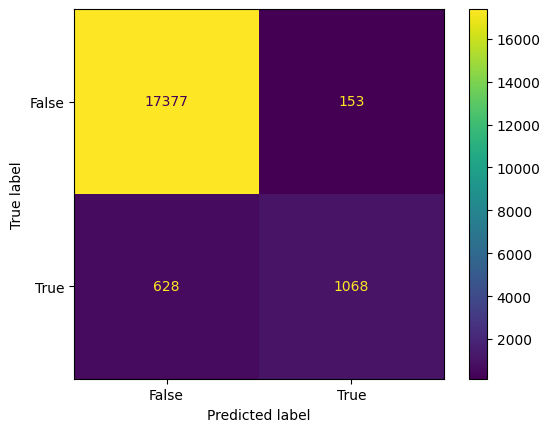

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17530
           1       0.87      0.63      0.73      1696

    accuracy                           0.96     19226
   macro avg       0.92      0.81      0.86     19226
weighted avg       0.96      0.96      0.96     19226



### Retrieve weights and odds ratio

In [ ]:
# Extract coefficients (weights)
coefficients = classifier.coef_[0]

# Calculate odds ratios and standard errors
odds_ratios = np.exp(coefficients)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients,
    'Odds Ratio': odds_ratios
})

# Print the DataFrame
print(results_df)

               Feature     Weight     Odds Ratio
0         hypertension   0.873878       2.396186
1        heart_disease   0.939600       2.558959
2      smoking_history  -0.252554       0.776814
3                  bmi   6.222051     503.735216
4          HbA1c_level  12.162525  191477.381759
5  blood_glucose_level   7.171194    1301.397256
6             age_disc   3.466635      32.028786
7        gender_Female  -0.142356       0.867312
8          gender_Male   0.147263       1.158659



> The interpretation of the numerical feature `'bmi'` : an **increase** in the bmi value **increases** the **odds** of having *diabetes vs. no diabetes* by a factor of about **503.7**, when all the features remain the same. This becuase correlation does not imply causation.





> The interpretation of the binary categorical feature `'gender_Male'` : for females, `Male=1`, the **odds** for diabetes vs. no diabetes are **higher** by a factor of **1.15**, given all the features stay the same. Instead, for `Male=0`, we have to look at the feature `'gender_Female'`. The **odds** for diabetes vs. no diabetes are **higher** by a factor of **0.86**, given all the features stay the same.



# **KNN**


---



* In KNN, the prediction for a new data point is determined by the majority class (for classification) or the mean of the closest k neighbors' values (for regression) among the training data points, where *k* is a user-defined parameter.

* Finding *k* can be tricky and you typically use techniques like cross-validation, grid search, or random search.

The interpretation and explanation of KNN does not follow procedures similar to the ones above. This because the KNN is an **instance-based learning algorithm** and so the **interpretation** can be done ***by-example***.

To explain a prediction in KNN:



1.   Retrieve the *k neighbors* that were used for the prediction.
2.   Analyze the k neighbors.

Hence, KNN offers a **local explanation** of the prediction as we explain the prediction of an individual instance by its closest example.





---

## **Exercise 3**


* Search for a **resonable** ***k*** parameter iterating over a range (1, 15) using a [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

* Use the **best k** already found and fit a [**KNN**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on the same dataset as before.

* Evaluate the KNN calculating the **mean accuracy** over test dataset.

* Analyze **Interpretability**:


> * Consider the instances 100, 150 and 200 of the train dataset.
* **Check** the **predicted target** for each instance.
* **Retrieve** the relative k-nearest neighbors.
* To **explain** the **predicted target** check the predicted targets for each of the k-nearest neighbors.



***Hint:***


> For calculating the mean accuracy you can use the [score( )](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score) function from scikit-learn.








## **Solution:**

### Imports

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Search for a reasonable ***K*** parameter and fit the KNN classifier

In [ ]:
parameters_grid = {"n_neighbors": np.arange(0,15)}
knn= KNeighborsClassifier()
knn_GSV = GridSearchCV(knn, param_grid=parameters_grid, cv = 5)
knn_GSV.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
print("Best Params" ,knn_GSV.best_params_)
print("Best score" ,knn_GSV.best_score_)

Best Params {'n_neighbors': 6}
Best score 0.9629008303947526


In [ ]:
# K=6
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
accuracy = knn.score(X_test,y_test)
print(f"Accuracy of KNN: {accuracy}")

Accuracy of KNN0.963747009258296


### Analyze interpretability

Instance 100

In [ ]:
# Let's interpret a prediction for a single instance
instance_indexes = 100  # Choose an instance from the test set
instance = X_test.iloc[instance_indexes]
instance_df = pd.DataFrame([instance], columns=feature_names)


# Get the indices of the k-nearest neighbors
distances, indices = knn.kneighbors([instance])

# Retrieve the k-nearest neighbors from the training set
neighbors_df = X_train.iloc[indices[0]]

# Explanation of the prediction
print("Instance:")
print(instance)
print("\nK-Nearest Neighbors:\n")
print(neighbors_df)
print("\n\nPredicted Target:")
print(knn.predict([instance]))

Instance:
hypertension           0.000000
heart_disease          0.000000
smoking_history        0.000000
bmi                    0.203145
HbA1c_level            0.472727
blood_glucose_level    0.340909
age_disc               0.666667
gender_Female          0.000000
gender_Male            1.000000
Name: 100, dtype: float64

K-Nearest Neighbors:

       hypertension  heart_disease  smoking_history       bmi  HbA1c_level  \
15224             0              0              0.0  0.203145     0.472727   
39889             0              0              0.0  0.203145     0.472727   
34376             0              0              0.0  0.203145     0.472727   
21094             0              0              0.0  0.203145     0.472727   
24060             0              0              0.0  0.203145     0.472727   
33407             0              0              0.0  0.203145     0.472727   

       blood_glucose_level  age_disc  gender_Female  gender_Male  
15224             0.340909  0.666667   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Given the predicted target of the instance, to explain this prediction we need to inspect the predictions of the k-nn.

list_of_knn = [15224, 39889, 34376, 21094, 24060, 33407]
print("\n Predicted targets of the k-nearest neighbors: ")
print(knn.predict(neighbors_df.loc[list_of_knn]))


 Predicted targets of the k-nearest neighbors: 
[0 0 0 0 0 0]




---


Instance 150

In [ ]:
# Let's interpret a prediction for a single instance
instance_indexes = 150  # Choose an instance from the test set
instance = X_test.iloc[instance_indexes]
instance_df = pd.DataFrame([instance], columns=feature_names)


# Get the indices of the k-nearest neighbors
distances, indices = knn.kneighbors([instance])

# Retrieve the k-nearest neighbors from the training set
neighbors_df = X_train.iloc[indices[0]]

# Explanation of the prediction
print("Instance:")
print(instance)
print("\nK-Nearest Neighbors:\n")
print(neighbors_df)
print("\n\nPredicted Target:")
print(knn.predict([instance]))

Instance:
hypertension           0.000000
heart_disease          0.000000
smoking_history        0.500000
bmi                    0.192583
HbA1c_level            0.418182
blood_glucose_level    0.295455
age_disc               0.666667
gender_Female          0.000000
gender_Male            1.000000
Name: 150, dtype: float64

K-Nearest Neighbors:

       hypertension  heart_disease  smoking_history       bmi  HbA1c_level  \
5958              0              0              0.5  0.203145     0.418182   
32899             0              0              0.5  0.203145     0.418182   
29962             0              0              0.5  0.203145     0.418182   
23689             0              0              0.5  0.203145     0.418182   
17796             0              0              0.5  0.203145     0.418182   
31278             0              0              0.5  0.203145     0.418182   

       blood_glucose_level  age_disc  gender_Female  gender_Male  
5958              0.295455  0.666667   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Given the predicted target of the instance, to explain this prediction we need to inspect the predictions of the k-nn.

list_of_knn = [5958, 32899, 29962, 23689, 17796, 31278]
print("\n Predicted targets of the k-nearest neighbors: ")
print(knn.predict(neighbors_df.loc[list_of_knn]))


 Predicted targets of the k-nearest neighbors: 
[0 0 0 0 0 0]




---


Instance 200

In [ ]:
# Let's interpret a prediction for a single instance
instance_indexes = 200  # Choose an instance from the test set
instance = X_test.iloc[instance_indexes]
instance_df = pd.DataFrame([instance], columns=feature_names)


# Get the indices of the k-nearest neighbors
distances, indices = knn.kneighbors([instance])

# Retrieve the k-nearest neighbors from the training set
neighbors_df = X_train.iloc[indices[0]]

# Explanation of the prediction
print("Instance:")
print(instance)
print("\nK-Nearest Neighbors:\n")
print(neighbors_df)
print("\n\nPredicted Target:")
print(knn.predict([instance]))

Instance:
hypertension           0.000000
heart_disease          0.000000
smoking_history        1.000000
bmi                    0.203145
HbA1c_level            0.181818
blood_glucose_level    0.545455
age_disc               0.666667
gender_Female          0.000000
gender_Male            1.000000
Name: 200, dtype: float64

K-Nearest Neighbors:

       hypertension  heart_disease  smoking_history       bmi  HbA1c_level  \
27148             0              0              1.0  0.231311     0.181818   
59402             0              0              1.0  0.234480     0.181818   
30021             0              0              1.0  0.223096     0.236364   
9186              0              0              1.0  0.203145     0.272727   
9954              0              0              1.0  0.203145     0.272727   
6190              0              0              1.0  0.203145     0.272727   

       blood_glucose_level  age_disc  gender_Female  gender_Male  
27148             0.545455  0.666667   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Given the predicted target of the instance, to explain this prediction we need to inspect the predictions of the k-nn.

list_of_knn = [27148, 59402, 30021, 9186, 9954, 6190]
print("\n Predicted targets of the k-nearest neighbors: ")
print(knn.predict(neighbors_df.loc[list_of_knn]))


 Predicted targets of the k-nearest neighbors: 
[0 0 0 0 0 0]
